q_0,0 = 0.6065306597126334
q_1,1 = 0
q_2,2 = 0.12922822263025124
q_3,3 = -0.2584564452605025
q_4,4 = 0.14494317781341526
q_5,5 = -0.04714486554949204
q_6,6 = -0.002687965479184299
q_7,7 = 0.023231774496880363
q_8,8 = -0.015599267668826494
q_9,9 = 0.010419410176000551
q_10,10 = -0.004312392674372826
q_11,11 = 0.0019142036925183653
q_12,12 = -0.0006172518591985187
q_13,13 = 0.00021276396687802177
q_14,14 = -5.712388806809926e-05
q_15,15 = 1.626591091140555e-05
q_16,16 = -3.7623220823306586e-06
q_17,17 = 9.164695789522095e-07
q_18,18 = -1.8666026780831125e-07
q_19,19 = 3.980722948109027e-08


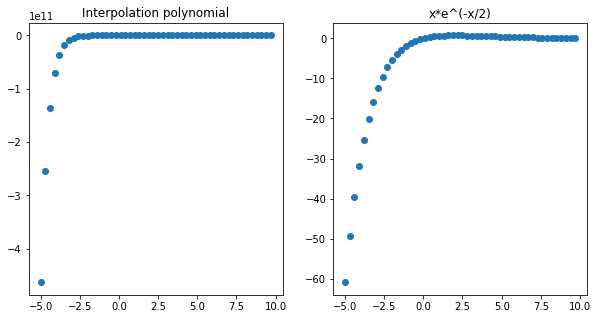

In [114]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x*(math.e**(-x/2))

def f_prime(x):
    return (math.e**(-x/2))*(1-0.5*x)

class HermitePolynomial():
    def __init__(self, x_array):
        self.q = []
        self.x_array = x_array
        self.n = len(self.x_array)-1

    def hermite_coeff(self, verbose=True):
        n = self.n
        z = [0 for i in range(2*n+2)]
        q = [[0 for i in range(2*n+2)] for j in range(2*n+2)]

        for i in range(n+1):
            xi = self.x_array[i]
            f_xi = f(xi)
     
            z[2*i] = xi
            z[2*i+1] = xi
            q[2*i][0] = f_xi
            q[2*i+1][0] = f_xi
            q[2*i][1] = f_prime(xi)

            if i!=0:
                q[2*i][1] = (q[2*i][0] - q[2*i-1][0]) / (z[2*i] - z[2*i-1])

        for i in range(2,2*n+2):
            for j in range(2,i+1):
                q[i][j] = (q[i][j-1] - q[i-1][j-1]) / (z[i] - z[i-j])

        if verbose:
            for i in range(2*n+2):
                print(f"q_{i},{i} = {q[i][i]}")

        return q

    def hermite_polynomial(self, x):
        n = self.n
        h = 0
        # using memorization to store previous term result
        memo = [1 for i in range(2*n+2)]

        for i in range(1,2*n+2):
            index = i/2-1 if i%2==0 else (i+1)/2-1
            index = int(index)
            memo[i] = memo[i-1]*(x-self.x_array[index])

        for i in range(2*n+2):
            h += self.q[i][i]*memo[i]     
        return h

    def plot(self):
        x = np.arange(-5.0, 10.0, .3)
        y = [self.hermite_polynomial(i) for i in x]
        y_f = [f(i) for i in x]

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
        axes[0].scatter(x,y)
        axes[0].set_title("Interpolation polynomial")
        axes[1].scatter(x,y_f)
        axes[1].set_title("x*e^(-x/2)")
     
        
x = [i for i in range(1,11)]
h = HermitePolynomial(x)
h.q = h.hermite_coeff()
h.plot()

# print(f(5))
# h.hermite_polynomial(5)
